In [ ]:
### Assigment 2 : Design a search system for BeiJing subway stations

In [2]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import re
import random

### Set up the base url, which is the common part of different links we need
base_url = "https://baike.baidu.com"

target = ["/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485"]

url = base_url + target[-1]
html = urlopen(url).read().decode('utf-8')
soup = BeautifulSoup(html, features='lxml')
### Find the format of the links we need
sub_urls = soup.find_all("a", {"target": "_blank", "href": re.compile("/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81\d+")})




In [4]:
### 北京地铁线路众多，基本已经完全建成的有，1，2，4，5，6，7，8，9，10，13，14， 15，16
###正在建设或者拟建设的有，3，17，18，19，20，22，28，21，31，S1,房山，燕房，昌平，机场线，新机场线
### 由于正在建设线路开通情况过于复杂，本project 只爬取基本已经完全建成的线路数据进行规划,也就是1，2，4，5，6，7，8，9，10，13，14， 15，16。

In [5]:
### 由于百度百科得到的各个线路具体站点的格式不是非常统一，经过对感兴趣的线路的具体分析，主要有三种不同格式的文本数据。现分为三类进行爬取：
### 第一类，包含线路：1 2 4 5 10 15 16
### 第二类，包含线路：6 9 
### 第三类，包含线路：8 14
### 第四类, 包含线路：7
### 第五类，包含线路：13

In [6]:
sub_links = [sub_urls[i]['href'] for i in range(len(sub_urls))]
sub_text = [sub_urls[i].get_text() for i in range(len(sub_urls))]
subinfo = dict(zip(sub_text,sub_links))
subinfo_txt_useful1 = ['北京地铁1号线','北京地铁2号线','北京地铁4号线','北京地铁5号线','北京地铁10号线','北京地铁15号线','北京地铁16号线']
subinfo_txt_useful2 = ['北京地铁6号线','北京地铁9号线']
subinfo_txt_useful3 = ['北京地铁8号线','北京地铁14号线']
subinfo_txt_useful4 = ['北京地铁7号线']
subinfo_txt_useful5 = ['北京地铁13号线']

In [7]:
### The built in fucntion itemgetter can be used to get all the values of dictionary 'subinfo' corresponding to the keys. 
from operator import itemgetter
subinfo_links_useful1 = itemgetter(*subinfo_txt_useful1)(subinfo)
subinfo_links_useful2 = itemgetter(*subinfo_txt_useful2)(subinfo)
subinfo_links_useful3 = itemgetter(*subinfo_txt_useful3)(subinfo)
subinfo_links_useful4 = itemgetter(*subinfo_txt_useful4)(subinfo)
subinfo_links_useful5 = itemgetter(*subinfo_txt_useful5)(subinfo)

### eg: print(subinfo_links_useful2) : ('/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%816%E5%8F%B7%E7%BA%BF',
###                                    '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%819%E5%8F%B7%E7%BA%BF')

In [8]:
### In the previous step, we just get the second part of the links we are interested in. 
### base_url + link is a complete and valid link
subinfo_links_useful1_final = []
subinfo_links_useful2_final = []
subinfo_links_useful3_final = []
subinfo_links_useful4_final = []
subinfo_links_useful5_final = []
subinfo_links_useful1_final = [base_url + link for link in subinfo_links_useful1]
subinfo_links_useful2_final = [base_url + link for link in subinfo_links_useful2]
subinfo_links_useful3_final = [base_url + link for link in subinfo_links_useful3]
subinfo_links_useful4_final = [base_url + subinfo_links_useful4]
subinfo_links_useful5_final = [base_url + subinfo_links_useful5]


###eg: print(subinfo_links_useful2): ['https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%816%E5%8F%B7%E7%BA%BF',
###                                  'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%819%E5%8F%B7%E7%BA%BF']

In [9]:
### So far we have already got all the links we need. 
### Next, my target is to get the useful text information of each webpage.

In [10]:
from requests_html import HTMLSession
session = HTMLSession()

In [17]:
### For type 1: Line 1 2 4 5 10 15 16
### Get all the station information from lines in type 1.
url1 = subinfo_links_useful1_final
L_type1 = []
for i in range(len(url1)):
    r  = session.get(url1[i])
    rel = r'[\u4e00-\u9fa5]+\n\d+:\d+\n\d+:\d+'
    pattern = re.compile(rel)
    likes = pattern.findall(r.html.text)
    L1 = []
    for line in likes: L1 += [line.split('\n')[0]]
    rel2 = r'[\u4e00-\u9fa5]+\n\u2014'
    pattern2 = re.compile(rel2)
    likes2 = pattern2.findall(r.html.text)
    L2 = []
    for line in likes2: L2 += [line.split('\n')[0]]
    L_type1 += [L1+L2]
    print('{} 包含了 {}'.format(subinfo_txt_useful1[i], L_type1[i]))

北京地铁1号线 包含了 ['苹果园', '古城', '八角游乐园', '八宝山', '玉泉路', '五棵松', '万寿路', '公主坟', '军事博物馆', '木樨地', '南礼士路', '复兴门', '西单', '天安门西', '天安门东', '王府井', '东单', '建国门', '永安里', '国贸', '大望路', '四惠', '四惠东']
北京地铁2号线 包含了 ['西直门', '积水潭', '鼓楼大街', '安定门', '雍和宫', '东直门', '东四十条', '朝阳门', '建国门', '北京站', '崇文门', '前门', '和平门', '宣武门', '长椿街', '复兴门', '阜成门', '车公庄']
北京地铁4号线 包含了 ['安河桥北', '北宫门', '西苑', '圆明园', '北京大学东门', '中关村', '海淀黄庄', '人民大学', '魏公村', '国家图书馆', '动物园', '西直门', '新街口', '平安里', '西四', '灵境胡同', '西单', '宣武门', '菜市口', '陶然亭', '北京南站', '马家堡', '角门西', '公益西桥']
北京地铁5号线 包含了 ['宋家庄', '刘家窑', '蒲黄榆', '天坛东门', '磁器口', '崇文门', '东单', '灯市口', '东四', '张自忠路', '北新桥', '雍和宫', '和平里北街', '和平西桥', '惠新西街南口', '惠新西街北口', '大屯路东', '北苑路北', '立水桥南', '立水桥', '天通苑南', '天通苑', '天通苑北']
北京地铁10号线 包含了 ['巴沟', '苏州街', '苏州街', '海淀黄庄', '海淀黄庄', '知春里', '知春里', '知春路', '知春路', '西土城', '西土城', '牡丹园', '牡丹园', '健德门', '健德门', '北土城', '北土城', '安贞门', '安贞门', '惠新西街南口', '惠新西街南口', '芍药居', '芍药居', '太阳宫', '太阳宫', '三元桥', '三元桥', '亮马桥', '亮马桥', '农业展览馆', '农业展览馆', '团结湖', '团结湖', '呼家楼', '呼家楼', '金台夕照', '金台夕照', '国贸', '国贸', '双井', '双井

In [12]:
### After the Analysis of  the text we get, I find that for line 10, the text information includes repeating information.
### Next, I will delete the repeated information and reassign to Line 10

In [18]:
L_type1[4] = [L_type1[4][(2*i)] for i in range(int(len(L_type1[4])/2))]
for i in range(len(url1)): print('{} 包含了 {}'.format(subinfo_txt_useful1[i], L_type1[i]))

北京地铁1号线 包含了 ['苹果园', '古城', '八角游乐园', '八宝山', '玉泉路', '五棵松', '万寿路', '公主坟', '军事博物馆', '木樨地', '南礼士路', '复兴门', '西单', '天安门西', '天安门东', '王府井', '东单', '建国门', '永安里', '国贸', '大望路', '四惠', '四惠东']
北京地铁2号线 包含了 ['西直门', '积水潭', '鼓楼大街', '安定门', '雍和宫', '东直门', '东四十条', '朝阳门', '建国门', '北京站', '崇文门', '前门', '和平门', '宣武门', '长椿街', '复兴门', '阜成门', '车公庄']
北京地铁4号线 包含了 ['安河桥北', '北宫门', '西苑', '圆明园', '北京大学东门', '中关村', '海淀黄庄', '人民大学', '魏公村', '国家图书馆', '动物园', '西直门', '新街口', '平安里', '西四', '灵境胡同', '西单', '宣武门', '菜市口', '陶然亭', '北京南站', '马家堡', '角门西', '公益西桥']
北京地铁5号线 包含了 ['宋家庄', '刘家窑', '蒲黄榆', '天坛东门', '磁器口', '崇文门', '东单', '灯市口', '东四', '张自忠路', '北新桥', '雍和宫', '和平里北街', '和平西桥', '惠新西街南口', '惠新西街北口', '大屯路东', '北苑路北', '立水桥南', '立水桥', '天通苑南', '天通苑', '天通苑北']
北京地铁10号线 包含了 ['巴沟', '苏州街', '海淀黄庄', '知春里', '知春路', '西土城', '牡丹园', '健德门', '北土城', '安贞门', '惠新西街南口', '芍药居', '太阳宫', '三元桥', '亮马桥', '农业展览馆', '团结湖', '呼家楼', '金台夕照', '国贸', '双井', '劲松', '潘家园', '十里河', '分钟寺', '成寿寺', '宋家庄', '石榴庄', '大红门', '角门东', '角门西', '草桥', '纪家庙', '首经贸', '丰台站', '泥洼', '西局', '六里桥', '莲花桥', '公主坟', '西钓鱼台', '慈寿寺'

In [14]:
### Now, print L_type1 again and find everything becomes normal.

In [15]:
### For type 2: Line 6 9
url2 = subinfo_links_useful2_final
L_type2 = []
for i in range(len(url2)):
    r  = session.get(url2[i])
    rel = r'[\u4e00-\u9fa5]+\n\d+:\d+\n'
    pattern = re.compile(rel)
    likes = pattern.findall(r.html.text)
    L1 = []
    for line in likes: L1 += [line.split('\n')[0]]
    rel2 = r'[\u4e00-\u9fa5]+\n\u2014'
    pattern2 = re.compile(rel2)
    likes2 = pattern2.findall(r.html.text)
    L2 = []
    for line in likes2: L2 += [line.split('\n')[0]]
    L_type2 += [L2+L1]
    print('{} 包含了 {}'.format(subinfo_txt_useful2[i], L_type2[i]))

北京地铁6号线 包含了 ['金安桥', '苹果园', '杨庄', '西黄村', '廖公庄', '田村', '海淀五路居', '慈寿寺', '花园桥', '白石桥南', '车公庄西', '车公庄', '平安里', '北海北', '南锣鼓巷', '东四', '朝阳门', '东大桥', '呼家楼', '金台路', '十里堡', '青年路', '褡裢坡', '黄渠', '常营', '草房', '物资学院路', '通州北关', '北运河西', '北运河东', '郝家府', '东夏园', '潞城']
北京地铁9号线 包含了 ['郭公庄', '丰台科技园', '科怡路', '丰台南路', '丰台东大街', '七里庄', '六里桥', '六里桥东', '北京西站', '军事博物馆', '白堆子', '白石桥南', '国家图书馆']


In [19]:
### For type 3: Line 8, 14
### Line 8 and 14 both include two disconnected segments. We need to indentify this case. 
url3 = subinfo_links_useful3_final
L_type3 = []
for i in range(len(url3)):
    r  = session.get(url3[i])
    rel = r'[\u4e00-\u9fa5]+\n\d+:\d+\n'
    pattern = re.compile(rel)
    likes = pattern.findall(r.html.text)
    L1 = []
    for line in likes: L1 += [line.split('\n')[0]]
    L_type3 += [L1]

   
### Line 8
Line8_north = []
Line8_south = []
Line8_north = L_type3[0][:(L_type3[0].index('南锣鼓巷')+1)]+['中国美术馆']
print(Line8_north)
Line8_south = ['瀛海'] + L_type3[0][(L_type3[0].index('南锣鼓巷')+1):]
print(Line8_south)
### Line 14
Line14_west = []
Line14_east = []
Line14_west = L_type3[1][:(L_type3[1].index('七里庄')+1)]+['西局']
print(Line14_west)
Line14_east = L_type3[1][(L_type3[1].index('七里庄')+1):]+['善各庄']
print(Line14_east)

['朱辛庄', '育知路', '平西府', '回龙观东大街', '霍营', '育新', '西小口', '永泰庄', '林萃桥', '森林公园南门', '奥林匹克公园', '奥体中心', '北土城', '安华桥', '安德里北街', '鼓楼大街', '什刹海', '南锣鼓巷', '中国美术馆']
['瀛海', '德茂', '五福堂', '火箭万源', '东高地', '和义', '大红门南', '海户屯', '木樨园', '永定门外', '天桥', '珠市口']
['张郭庄', '园博园', '大瓦窑', '郭庄子', '大井', '七里庄', '西局']
['北京南站', '永定门外', '景泰', '蒲黄榆', '方庄', '十里河', '北工大西门', '九龙山', '大望路', '金台路', '朝阳公园', '枣营', '东风北桥', '将台', '望京南', '阜通', '望京', '东湖渠', '来广营', '善各庄']


In [20]:
L_3 = [Line8_north]+[Line8_south]+[Line14_west]+[Line14_east] 

In [21]:
### For type 4: Line 7
url4 = subinfo_links_useful4_final
L_type4 = []
for i in range(len(url4)):
    r  = session.get(url4[i])
    rel = r'[\u4e00-\u9fa5]+\n\d+:\d+\n'
    pattern = re.compile(rel)
    likes = pattern.findall(r.html.text)
    L1 = []
    for line in likes: L1 += [line.split('\n')[0]]
    rel2 = r'[\u4e00-\u9fa5]+\n\-'
    pattern2 = re.compile(rel2)
    likes2 = pattern2.findall(r.html.text)
    L2 = []
    for line in likes2: L2 += [line.split('\n')[0]]
    L_type4 += [L2+L1]
    print('{} 包含了 {}'.format(subinfo_txt_useful4[i], L_type4))
    #type(subinfo_txt_useful4[i][])

北京地铁7号线 包含了 [['北京西站', '湾子', '达官营', '广安门内', '菜市口', '虎坊桥', '珠市口', '桥湾', '磁器口', '广渠门内', '广渠门外', '九龙山', '大郊亭', '百子湾', '化工', '南楼梓庄', '欢乐谷景区', '双合', '焦化厂']]


In [23]:
### For type 5: Line 13
url5 = subinfo_links_useful5_final
L_type5 = []
for i in range(len(url5)):
    r  = session.get(url5[i])
    rel = r'[\u4e00-\u9fa5]+\n\d+:\d+\n'
    pattern = re.compile(rel)
    likes = pattern.findall(r.html.text)
    L1 = []
    for line in likes: L1 += [line.split('\n')[0]]
    rel2 = r'[\u4e00-\u9fa5]+\n\u2014+\n\d+:\d+'
    pattern2 = re.compile(rel2)
    likes2 = pattern2.findall(r.html.text)
    L2 = []
    for line in likes2: L2 += [line.split('\n')[0]]
    L_type5 += [L2+L1]
    print('{} 包含了 {}'.format(subinfo_txt_useful5[i], L_type5))

北京地铁13号线 包含了 [['西直门', '大钟寺', '知春路', '五道口', '上地', '西二旗', '龙泽', '回龙观', '霍营', '立水桥', '北苑', '望京西', '芍药居', '光熙门', '柳芳', '东直门']]


In [24]:
### Incorparating all the lines' information into one list as Lines_total
Lines_total = L_type1 + L_type2 + L_3 + L_type4 + L_type5

In [57]:
### Now, I have already got all the stations' information of different lines in Beijing subway system.
### Next, I will use some special methods to get the relationship nextwork graph of different stations

In [25]:
### shallow_merge_two_dicts here is a function aimed to merge two dictionaries who have disparate keys and values 
def shallow_merge_two_dicts(x, y):
    """Given two dicts, merge them into a new dict as a shallow copy."""
    z = x.copy()
    z.update(y)
    return z

In [26]:
### tran_list_into_dict here is a function to transfer the elements in a list as dictionary orderly.
### Here is a small example to show how this function will work:
### a = ['1','2','3','4','5','6'] 
### print(trans_list_into_dict(a)) 
### we get: {'1': ['2'], '2': ['3'], '3': ['4'], '4': ['5'], '5': ['6']}

def trans_list_into_dict(x):
 dt = {}
 for i in range(len(x)-1):dt = shallow_merge_two_dicts(dt,dict(zip([x[i]],[[x[i+1]]])))
 return dt


In [37]:
### tran_list_into_dict_reverse here is a function to transfer the elements in a list as dictionary in reversed order.
### Here is a small example to show how this function will work:
### a = ['1','2','3','4','5','6'] 
### print(trans_list_into_dict_reverse(a)) 
### we get:{'6': ['5'], '5': ['4'], '4': ['3'], '3': ['2'], '2': ['1']}

def trans_list_into_dict_reverse(x):
 dt = {}
 for i in range(1,len(x)):dt = shallow_merge_two_dicts(dt,dict(zip([x[len(x)-i]],[[x[len(x)-1-i]]])))
 return dt



In [28]:
### deep_merge_two_dicts here is a function to merge two dictionaries in to one dictionary. 
### If two dicts have the same key with different values, the function will merge the two dicts into one with one key
### and all values from initial two dicts.
### Here is a small example to show how this function will work:
### s1 = {'a':[1],'b':[2],'c':[3],'d':[4]}  s2 = {'a':[10],'e':[8],'c':[5],'f':[9]}
### deep_merge_two_dicts(s1,s2)
### we get: {'a': [1, 10], 'b': [2], 'c': [3, 5], 'd': [4], 'e': [8], 'f': [9]}

In [38]:
def deep_merge_two_dicts(dic1,dic2):
    dic = {}
    for key in dic1:
        if dic2.get(key):
            dic[key] = dic1[key]+dic2[key]
        else:
            dic[key] = dic1[key]
    for key in dic2:
        if dic1.get(key):
            pass
        else:
            dic[key] = dic2[key]
    return dic

In [39]:
### Store all the dicts information into one list
'''Lines_total_dicts = []
for lines in Lines_total:
    Lines_total_dicts += [trans_list_into_dict(lines)] + [trans_list_into_dict_reverse(lines)]'''
   

'Lines_total_dicts = []\nfor lines in Lines_total:\n    Lines_total_dicts += [trans_list_into_dict(lines)] + [trans_list_into_dict_reverse(lines)]'

In [40]:
len(Lines_total)

15

In [41]:
### The function here can take a list of lists, which store the stations of each Line and then input a list of dictionary
### which shows the connected relationship among different stations.
def get_Lines_total_connection(Lines_total):
    Lines_total_dicts = []
    for lines in Lines_total: Lines_total_dicts += [trans_list_into_dict(lines)] + [trans_list_into_dict_reverse(lines)]
    Lines_total_connection = deep_merge_two_dicts(Lines_total_dicts[0],Lines_total_dicts[1])
    for i in range(2,len(Lines_total_dicts)):
        Lines_total_connection = deep_merge_two_dicts(Lines_total_connection,Lines_total_dicts[i])
    return Lines_total_connection

In [42]:
Lines_total_connection = get_Lines_total_connection(Lines_total)

In [53]:
import networkx as nx
Lines_graph = nx.Graph()
Lines_graph.add_nodes_from(list(Lines_total_connection.keys()))

In [54]:
Lines_graph = nx.Graph()
Lines_graph.add_nodes_from(list(Lines_total_connection.keys()))

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt

/Users/jingweili/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/jingweili/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/jingweili/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/jingweili/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.w

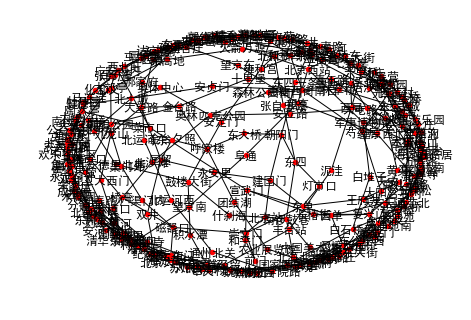

In [56]:
station_with_line = nx.Graph(Lines_total_connection)
nx.draw(station_with_line, with_labels=True, lbels_size = 1, node_size=20)

In [46]:
from collections import defaultdict
Lines_total_connection_info = defaultdict(list)
Lines_total_connection_info.update(Lines_total_connection)

In [47]:
def search(start, destination, connection_grpah, sort_candidate):
    pathes = [[start]]
    
    visitied = set()
    
    while pathes: # if we find existing pathes
        path = pathes.pop(0)
        froninter = path[-1]
        
        if froninter in visitied: continue
            
        successors = connection_grpah[froninter]
        
        for city in successors:
            if city in path: continue  # eliminate loop
                
            new_path = path + [city]
            
            pathes.append(new_path)
            
            if city == destination: return new_path
        
        visitied.add(froninter)
        
        pathes = sort_candidate(pathes)  # 我们可以加一个排序函数 对我们的搜索策略进行控制

In [48]:
def transfer_stations_first(pathes): 
    return sorted(pathes, key=len)

In [49]:
def transfer_as_much_possible(pathes):
    return sorted(pathes, key=len, reverse=True)

In [50]:
search(start='崇文门', destination='国家图书馆', connection_grpah=Lines_total_connection_info,sort_candidate=transfer_stations_first)

['崇文门',
 '前门',
 '和平门',
 '宣武门',
 '长椿街',
 '复兴门',
 '阜成门',
 '车公庄',
 '车公庄西',
 '白石桥南',
 '国家图书馆']

In [51]:
def pretty_print(cities):
    print('🚗->'.join(cities))

In [52]:
pretty_print(search('中关村', '三元桥', connection_grpah=Lines_total_connection_info,sort_candidate=transfer_stations_first))

中关村🚗->海淀黄庄🚗->知春里🚗->知春路🚗->西土城🚗->牡丹园🚗->健德门🚗->北土城🚗->安贞门🚗->惠新西街南口🚗->芍药居🚗->太阳宫🚗->三元桥
